libs


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

dataset


In [2]:
# import
SENTIMENT_DATASET_FILE_NAME = "100_sentiment.csv"
SENTIMENT_DATASET_FILE_PATH = f"{SENTIMENT_DATASET_FILE_NAME}"
DATA_FRAME_SENTIMENT_DATASET = pd.read_csv(SENTIMENT_DATASET_FILE_PATH)
DATA_FRAME_SENTIMENT_DATASET_LENGTH = len(DATA_FRAME_SENTIMENT_DATASET)
print(f"labelled dataset: {DATA_FRAME_SENTIMENT_DATASET_LENGTH} tweets")
display(DATA_FRAME_SENTIMENT_DATASET.tail(1))
sentiment = DATA_FRAME_SENTIMENT_DATASET

labelled dataset: 100 tweets


,user_id,username,user_display_name,tweet_id,full_text,created_at,sentiment_label,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,final_negation_text,after_stopwords_text,after_stemming_text,preprocessed_text,compound_score,positive_score,negative_score,inset_label
99,1.815290e+18,dini_wulan2001,Dini Wulandari,1.840890e+18,@IndonesiaJadi Penajam Paser Utara bakal jadi ...,Mon Sep 30 22:57:54 +0000 2024,positif,penajam paser utara bakal jadi penyuplai panga...,penajam paser utara bakal jadi penyuplai panga...,penajam paser utara bakal jadi penyuplai panga...,penajam paser utara bakal jadi penyuplai panga...,penajam paser utara bakal jadi penyuplai panga...,penajam paser utara penyuplai pangan utama ibu...,najam paser utara suplai pangan utama ibukota ...,najam paser utara suplai pangan utama ibukota ...,-0.1536,"{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'comp...","{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'comp...",negatif


sentiment_label
negatif    44
netral     32
positif    24
Name: count, dtype: int64


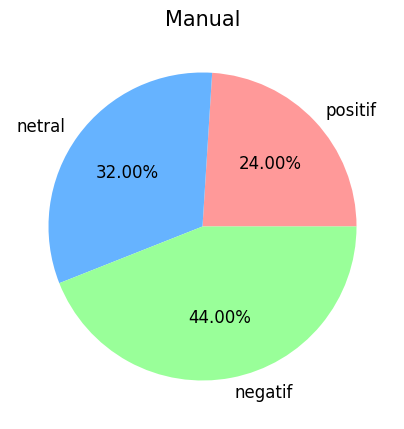

In [4]:
inset_label	= sentiment["sentiment_label"]
inset_label_counts = inset_label.value_counts()
print(inset_label_counts)

positif_inset_perc = inset_label_counts.positif / inset_label_counts.sum() * 100
netral_inset_perc = inset_label_counts.netral / inset_label_counts.sum() * 100
negatif_inset_perc = inset_label_counts.negatif / inset_label_counts.sum() * 100

labels = 'positif', 'netral', 'negatif'
sizes = [positif_inset_perc, netral_inset_perc, negatif_inset_perc]
colors = ['#ff9999','#66b3ff','#99ff99']
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.pie(sizes, labels = labels, autopct='%.2f%%', colors=colors, textprops={'fontsize': 12})
ax.set_title('Manual', fontsize=15)
plt.show()

tf-idf


In [5]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(sentiment["preprocessed_text"]).toarray()

smote


In [6]:
smote = SMOTE(random_state=21)
X_smote, Y_smote = smote.fit_resample(X_tfidf, sentiment["sentiment_label"])

sentiment_label
negatif    44
positif    44
netral     44
Name: count, dtype: int64


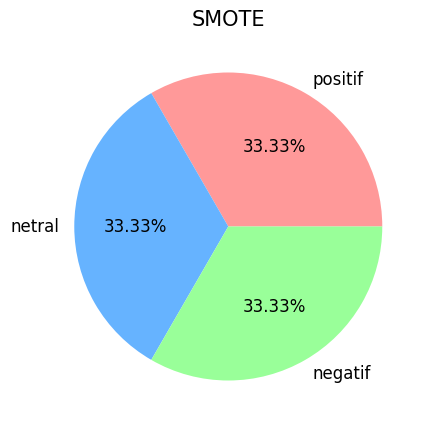

In [7]:
# SMOTE
inset_label	= Y_smote
inset_label_counts = inset_label.value_counts()
print(inset_label_counts)

positif_inset_perc = inset_label_counts.positif / inset_label_counts.sum() * 100
netral_inset_perc = inset_label_counts.netral / inset_label_counts.sum() * 100
negatif_inset_perc = inset_label_counts.negatif / inset_label_counts.sum() * 100

labels = 'positif', 'netral', 'negatif'
sizes = [positif_inset_perc, netral_inset_perc, negatif_inset_perc]
colors = ['#ff9999','#66b3ff','#99ff99']
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.pie(sizes, labels = labels, autopct='%.2f%%', colors=colors, textprops={'fontsize': 12})
ax.set_title('SMOTE', fontsize=15)
plt.show()

data split


In [8]:
X_train_9010,X_test_9010,Y_train_9010,Y_test_9010=train_test_split(X_smote, Y_smote, test_size=0.1, random_state=21)
X_train_8020,X_test_8020,Y_train_8020,Y_test_8020=train_test_split(X_smote, Y_smote, test_size=0.2, random_state=21)
X_train_7030,X_test_7030,Y_train_7030,Y_test_7030=train_test_split(X_smote, Y_smote, test_size=0.3, random_state=21)

knn


In [9]:
gs_knn = KNeighborsClassifier()
param_grid = {
  'n_neighbors': [1, 3, 5, 7, 9],
  'weights': ['distance'],
  'metric': ['euclidean', 'manhattan', 'cosine']
}

def get_grid_search(X_train, Y_train, X_test, Y_test, ratio):
  # Initialize GridSearchCV with your model, parameter grid, and number of cross-validation folds
  grid_search = GridSearchCV(estimator=gs_knn, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

  # Assuming you have your training data X_train and y_train
  grid_search.fit(X_train, Y_train)

  # Best model
  best_knn = grid_search.best_estimator_

  print("===============================================================")
  print(f"| {ratio} split |")
  print("===============================================================")
  # Best hyperparameters
  print("Best Parameters:", grid_search.best_params_)
  # Evaluate the best model on your test set
  y_pred = best_knn.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  print("Test Set Accuracy:", accuracy)
  print("===============================================================")

  return grid_search

gs_9010 = get_grid_search(X_train_9010, Y_train_9010, X_test_9010, Y_test_9010, "90:10")
gs_8020 = get_grid_search(X_train_8020, Y_train_8020, X_test_8020, Y_test_8020, "80:20")
gs_7030 = get_grid_search(X_train_7030, Y_train_7030, X_test_7030, Y_test_7030, "70:30")

| 90:10 split |
Best Parameters: {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'distance'}
Test Set Accuracy: 0.5714285714285714
| 80:20 split |
Best Parameters: {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'distance'}
Test Set Accuracy: 0.5925925925925926
| 70:30 split |
Best Parameters: {'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}
Test Set Accuracy: 0.5


| 90:10 split |
| k = 1 |
              precision    recall  f1-score   support

     negatif       1.00      0.29      0.44         7
      netral       0.50      1.00      0.67         3
     positif       0.50      0.75      0.60         4

    accuracy                           0.57        14
   macro avg       0.67      0.68      0.57        14
weighted avg       0.75      0.57      0.54        14

| accuracy: 0.5714285714285714 |
| precision: 0.75 |
| recall: 0.5714285714285714 |
| f1: 0.5365079365079365 |


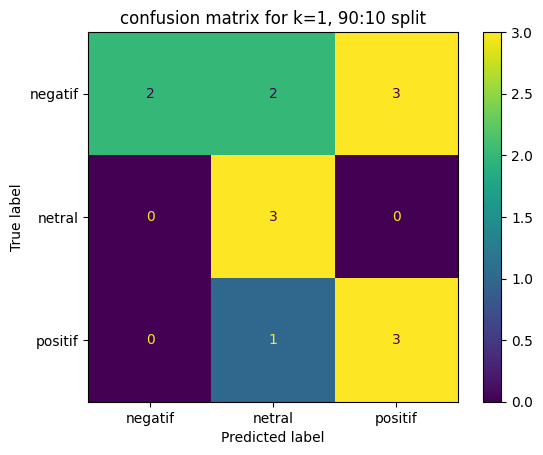

| 80:20 split |
| k = 1 |
              precision    recall  f1-score   support

     negatif       0.86      0.46      0.60        13
      netral       0.38      1.00      0.56         5
     positif       0.71      0.56      0.63         9

    accuracy                           0.59        27
   macro avg       0.65      0.67      0.59        27
weighted avg       0.72      0.59      0.60        27

| accuracy: 0.5925925925925926 |
| precision: 0.7220187220187221 |
| recall: 0.5925925925925926 |
| f1: 0.6001028806584363 |


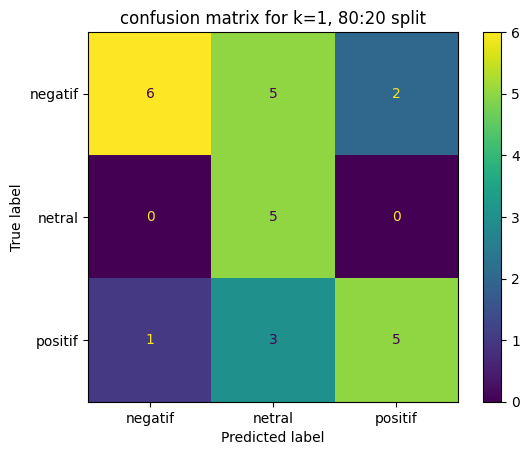

| 70:30 split |
| k = 3 |
              precision    recall  f1-score   support

     negatif       0.67      0.33      0.44        18
      netral       0.38      0.80      0.52        10
     positif       0.60      0.50      0.55        12

    accuracy                           0.50        40
   macro avg       0.55      0.54      0.50        40
weighted avg       0.58      0.50      0.49        40

| accuracy: 0.5 |
| precision: 0.5752380952380952 |
| recall: 0.5 |
| f1: 0.49266862170087966 |


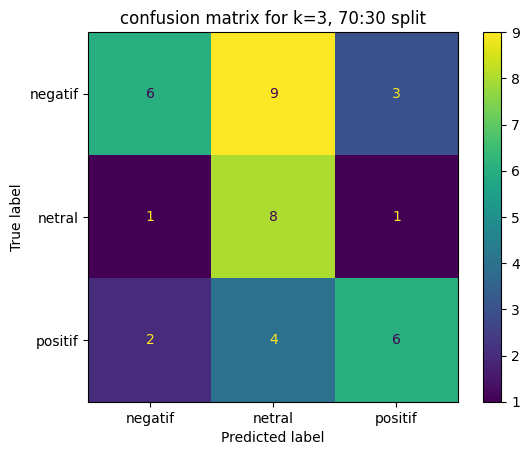

In [10]:
def train_evaluate_knn(k, X_train, Y_train, X_test, Y_test, ratio, w, m):
    knn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print("===============================================================")
    print(f"| {ratio} split |")
    print(f"| k = {k} |")
    print("===============================================================")
    print(classification_report(Y_test, y_pred, target_names=knn.classes_))
    print("===============================================================")
    
    # print(f"| accuracy: {accuracy:.2f} |")
    print(f"| accuracy: {accuracy} |")
    print(f"| precision: {precision} |")
    print(f"| recall: {recall} |")
    print(f"| f1: {f1} |")
    print("===============================================================")
    
    cm = confusion_matrix(Y_test, y_pred, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot()
    plt.title(f"confusion matrix for k={k}, {ratio} split")
    plt.show()
    
    return knn

best_9010 = gs_9010.best_params_
best_8020 = gs_8020.best_params_
best_7030 = gs_7030.best_params_

knn_9010 = train_evaluate_knn(best_9010["n_neighbors"], X_train_9010, Y_train_9010, X_test_9010, Y_test_9010, "90:10", best_9010["weights"], best_9010["metric"])
knn_8020 = train_evaluate_knn(best_8020["n_neighbors"], X_train_8020, Y_train_8020, X_test_8020, Y_test_8020, "80:20", best_8020["weights"], best_8020["metric"])
knn_7030 = train_evaluate_knn(best_7030["n_neighbors"], X_train_7030, Y_train_7030, X_test_7030, Y_test_7030, "70:30", best_7030["weights"], best_7030["metric"])